In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

In [3]:
import rich
from eng_module import utils as ut
import rc_section_capacity_module as rcscm
# from rc_section_capacity_module import concrete_section_analysis

import pandas as pd

from matplotlib.figure import Figure

import plotly.express as px

from sectionproperties.pre.library import rectangular_section
import concreteproperties.stress_strain_profile as ssp

from concreteproperties import (
    Concrete,
    ConcreteSection,
    SteelBar,
    add_bar_circular_array,
    add_bar_rectangular_array,
)
from plotly import graph_objects as go



from eng_module import utils as ut

from rich import print

import numpy as np

import hashlib as hl

In [4]:
    conc_class = "B30"
    conc_Rb = 17
    conc_Rbt = 1.15
    conc_eb1 = 0.0005230769230769
    conc_eb2_short = 0.0035

    rebar_class = "A500"
    rebar_Rs = 435
    rebar_es2 = 0.025

    concrete_material = Concrete(
        name=conc_class,
        density=2.4e-6,
        stress_strain_profile=ssp.ConcreteLinear(elastic_modulus=34.8e3),
        ultimate_stress_strain_profile=ssp.BilinearStressStrain(
            compressive_strength=conc_Rb,
            compressive_strain=conc_eb1,
            ultimate_strain=conc_eb2_short,
        ),
        flexural_tensile_strength=conc_Rbt,
        colour="lightgrey",
    )

    rebar_material = SteelBar(
        name=rebar_class,
        density=7.85e-6,
        stress_strain_profile=ssp.SteelElasticPlastic(
            yield_strength=rebar_Rs,
            elastic_modulus=200e3,
            fracture_strain=rebar_es2,
        ),
        colour="grey",
    )

In [9]:
    h =  500
    b =  500
    c_mat =  concrete_material
    r_mat =  rebar_material
    dr_top =  20
    nr_top =  0
    nrl_top =  1
    srl_top =  70
    cc_top =  35
    dr_bot =  20
    nr_bot =  2
    nrl_bot =  1
    srl_bot =  70
    cc_bot =  50
    dr_side = 0
    nr_side = 0
    nrl_side = 0
    srl_side = 0
    cc_side = 10

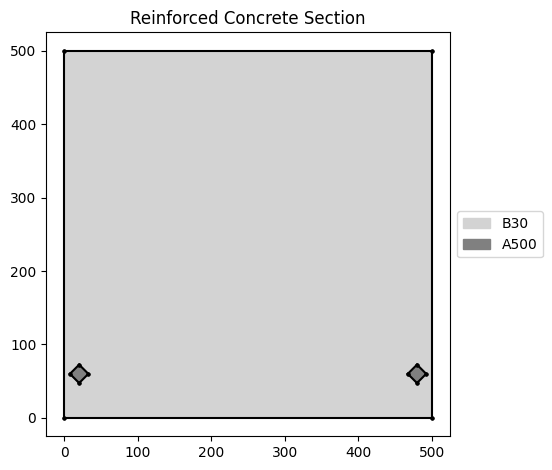

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [11]:
sec, img = rcscm.create_rectangular_section(h, b, c_mat, r_mat, dr_top, nr_top, nrl_top, srl_top, cc_top, dr_bot, nr_bot, nrl_bot, srl_bot, cc_bot, dr_side, nr_side, nrl_side, srl_side, cc_side)

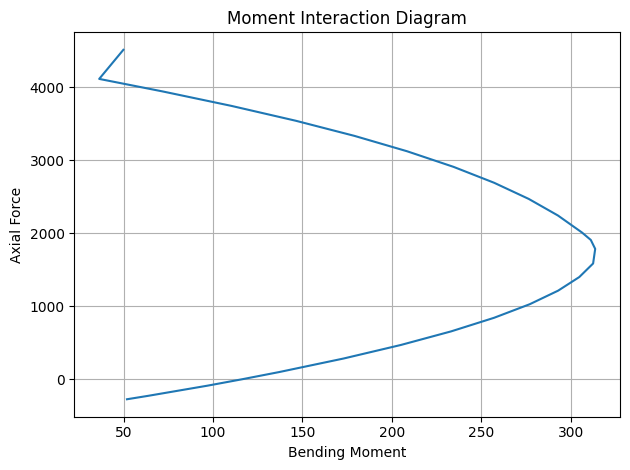

In [15]:
mi_res, img = rcscm.concrete_section_moment_interaction_diagram(sec, np.radians(5))

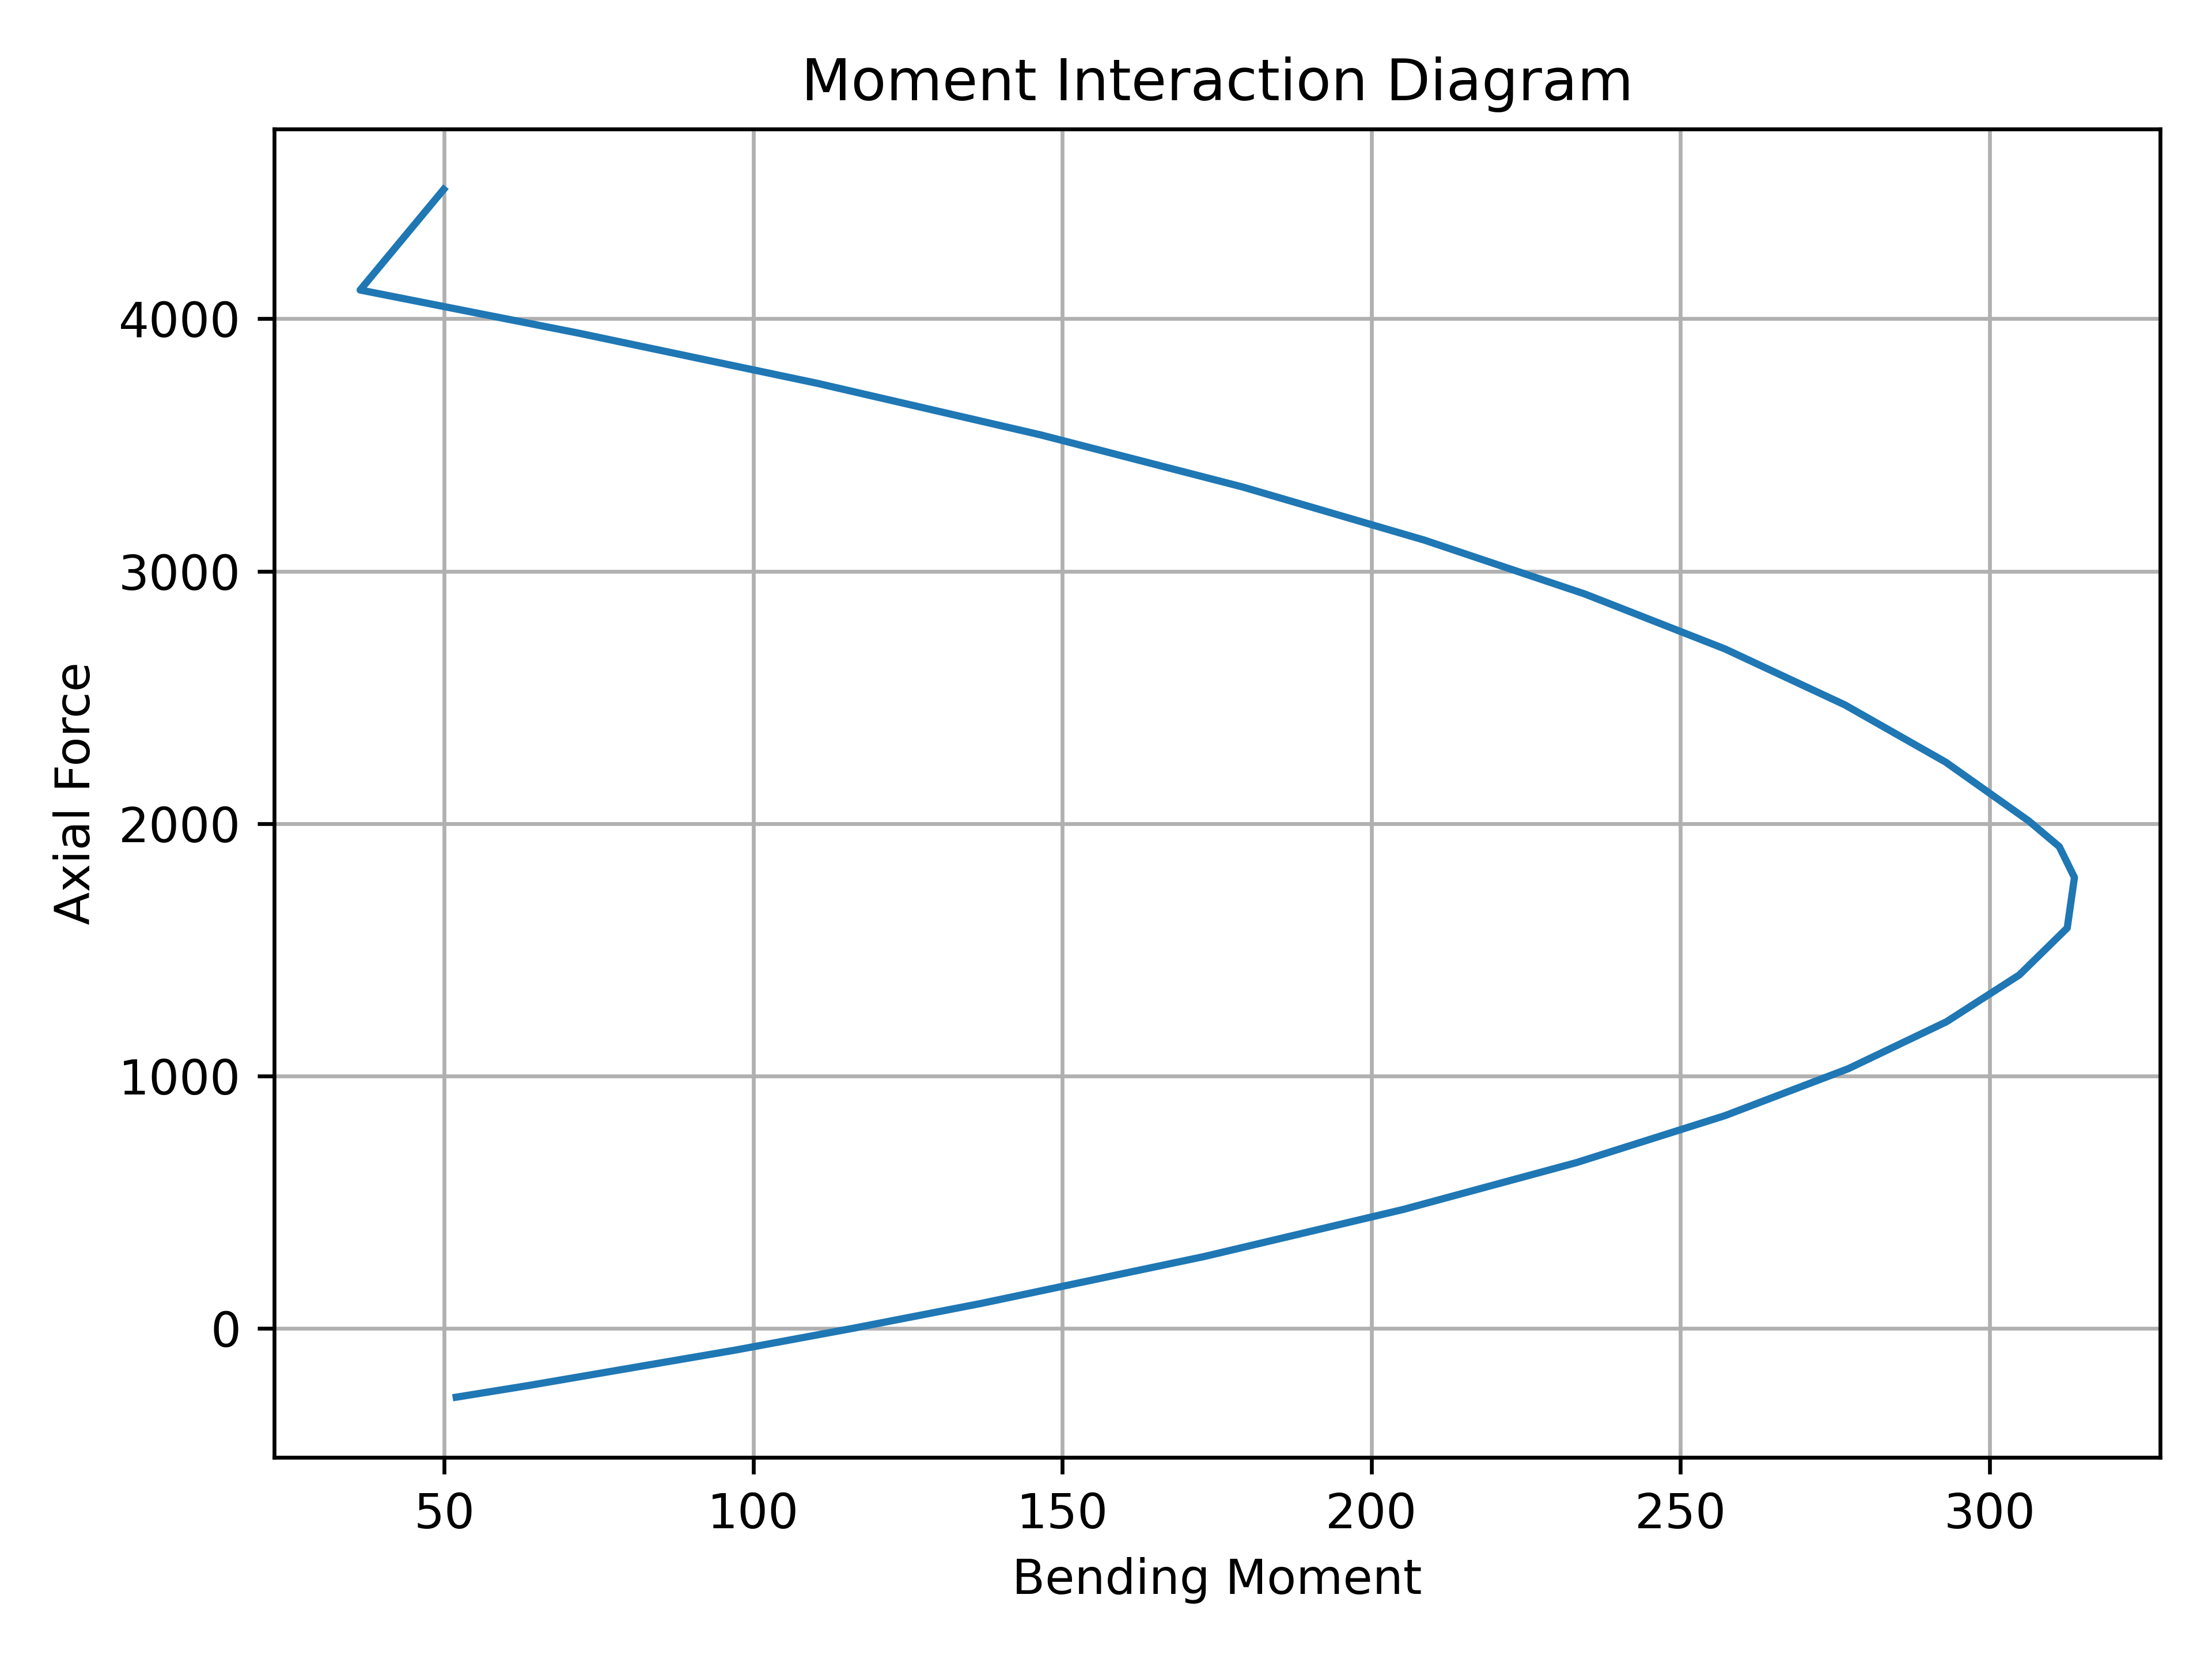

In [16]:
img